In [1]:
%matplotlib notebook

import requests
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from io import StringIO
from datetime import datetime as dt
from pprint import pprint
import mplcursors

url = "http://hgis.uw.edu/virus/assets/virus.csv"

In [2]:
response = requests.get(url, allow_redirects=True)
df_raw = pd.read_csv(StringIO(response.text), dtype=str, parse_dates=True, index_col='datetime')

In [3]:
df = df_raw.copy()
def convertCell(cell):
    if str(cell).lower() == 'nan' or cell.count('-') != 3:
        cell = '0-0-0-0'
    return tuple(map(int, cell.split('-')))
    
fieldNames = ('confirmed', 'suspected', 'cured', 'dead')
df = df.applymap(convertCell)
con = df.applymap(lambda x: x[0])
sus = df.applymap(lambda x: x[1])
cur = df.applymap(lambda x: x[2])
ded = df.applymap(lambda x: x[3])

<IPython.core.display.Javascript object>


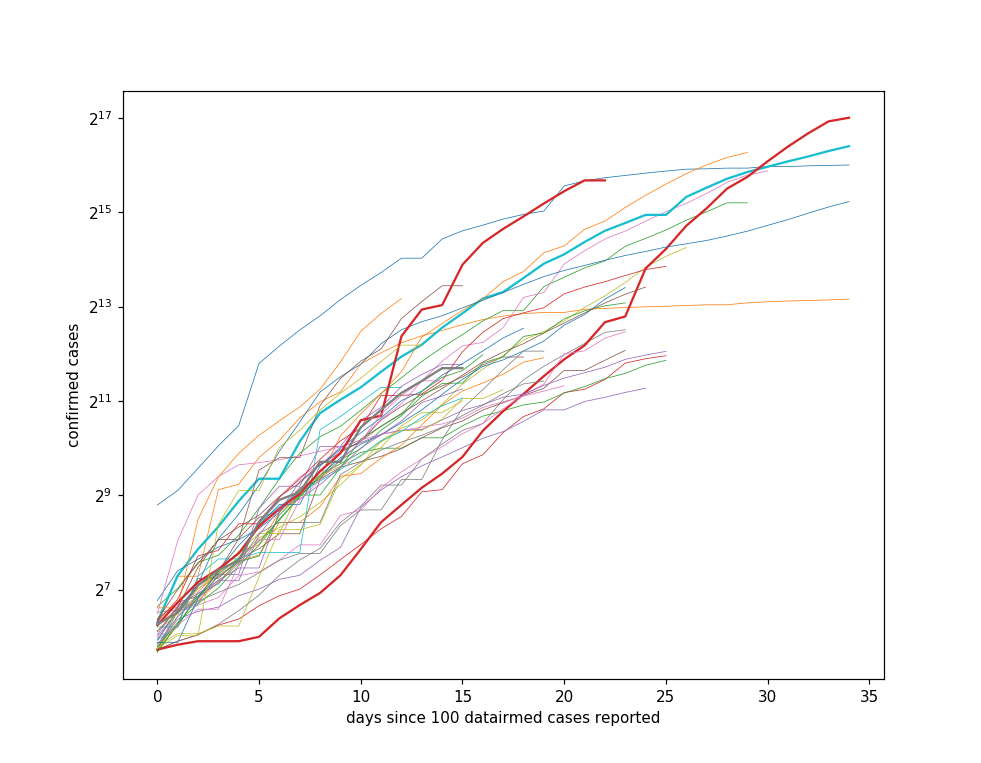

In [20]:
def logGraph(data, xlabel='', ylabel=''):
    fig = plt.figure(figsize=(9, 7))
    ax = fig.subplots()
    ax.set_yscale('log', basey=2)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    hilight = {'united states', 'italy', 'louisiana', 'new york'}
#     hilight = {'louisiana'}

    for c, s in data.items():
        series = s[lambda x: x > 50]
        if len(series) > 2 and series[-1] > 2e3:
            width = .5 if c not in hilight else 1.5
            d = list(series)[:40] # truncate the data to 40 days since only a few places have data older than that
            ax.plot(list(series)[:35], label=c, linewidth=width)
    mplcursors.cursor().connect("add", lambda sel: sel.annotation.set_text(sel.artist.get_label()))
    plt.show()
logGraph(con, xlabel='days since 100 datairmed cases reported', ylabel='confirmed cases')

<IPython.core.display.Javascript object>


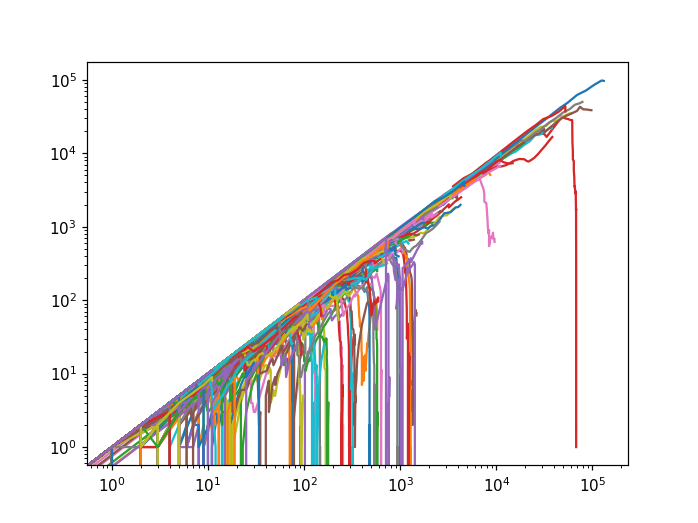

In [26]:
new_infections = con.apply(lambda x: x.diff(periods=7))
fig = plt.figure()
ax = fig.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(con, new_infections)
plt.show()

### how long until the US runs out of hospital beds & respirators
assumptions:
* hospitalizations are preportional to infections
* no major breakthrough on treatment
* no significant change in social distancing/other practices

In [6]:
beds_raw = pd.read_csv('./hospitalBeds.csv')
beds_raw.columns

Index(['Rank', 'Country/territory', 'Continent', '2013', '2014', '2015',
       '2016', '2017', 'Actual', 'Proportional (%)', 'Occupancy (%)',
       'ICU-CCB beds/100,000 inhabitants', 'Ventilators'],
      dtype='object')

In [7]:
cols = ['Country/territory', '2017',  'Occupancy (%)', 'Ventilators', 'ICU-CCB beds/100,000 inhabitants']
# beds = beds[cols].pivot(index='Country/territory', columns=['2017', 
#                                                       'Occupancy (%)',
#                                                       'Ventilators',
beds = beds_raw[cols]
beds
# beds = beds.set_index('Country/territory')
# beds.pivot()

,Country/territory,2017,Occupancy (%),Ventilators,"ICU-CCB beds/100,000 inhabitants"
0,Japan,13.05,75.5,NaN,7.3
1,South Korea,12.27,NaN,"9,795",10.6
2,Russia,8.05,NaN,"40,000",8.3
3,Germany,8.00,79.8,"25,000",29.2
4,Austria,7.37,73.8,"2,500",21.8
5,Hungary,7.02,65.5,"15,500",13.8
6,Czech Republic,6.63,70.1,NaN,11.6
7,Poland,6.62,NaN,"10,100",6.9
8,Lithuania,6.56,73.2,NaN,15.5
9,France,5.98,75.6,NaN,11.6


In [8]:
print('\n'*50) # stop jupyter from scrolling up every time i hit ctrl+enter